In [1]:
import pandas as pd

df = pd.read_csv('./data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
desc_df = df.describe(include='all').T
desc_df

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,918.0,NaN,NaN,NaN,53.510893,9.432617,28.0,47.0,54.0,60.0,77.0
Sex,918,2,M,725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChestPainType,918,4,ASY,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RestingBP,918.0,NaN,NaN,NaN,132.396514,18.514154,0.0,120.0,130.0,140.0,200.0
Cholesterol,918.0,NaN,NaN,NaN,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,NaN,NaN,NaN,0.233115,0.423046,0.0,0.0,0.0,0.0,1.0
RestingECG,918,3,Normal,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxHR,918.0,NaN,NaN,NaN,136.809368,25.460334,60.0,120.0,138.0,156.0,202.0
ExerciseAngina,918,2,N,547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oldpeak,918.0,NaN,NaN,NaN,0.887364,1.06657,-2.6,0.0,0.6,1.5,6.2


In [5]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=30)
print("Train data shape:", X_train.shape,
      "\nTest data shape:",X_test.shape)


Train data shape: (826, 11) 
Test data shape: (92, 11)


In [29]:
len(X_train[X_train.duplicated()])

0

Analyzing unexpected zeros in both features RestingBP and Cholesterol:

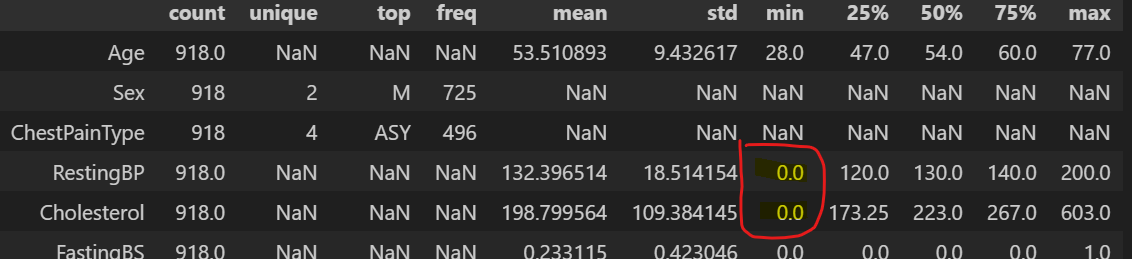

In [30]:
# 
for c in ['RestingBP','Cholesterol']:
    print(f'Whole Data: Number of Zeros in {c}',X[X[c] == 0].shape[0])
print('\n')
for c in ['RestingBP','Cholesterol']:
    print(f'Train Data: Number of Zeros in {c}',X_train[X_train[c] == 0].shape[0])


Whole Data: Number of Zeros in RestingBP 1
Whole Data: Number of Zeros in Cholesterol 172


Train Data: Number of Zeros in RestingBP 1
Train Data: Number of Zeros in Cholesterol 155


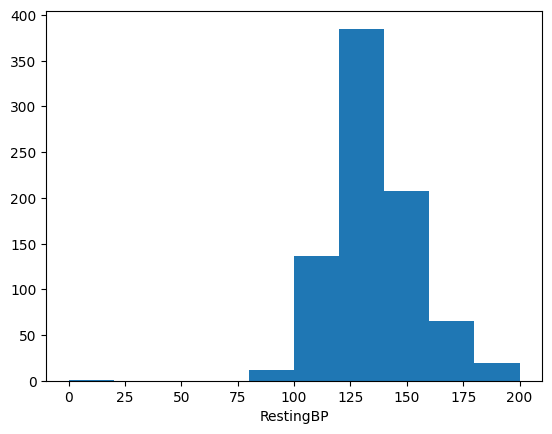

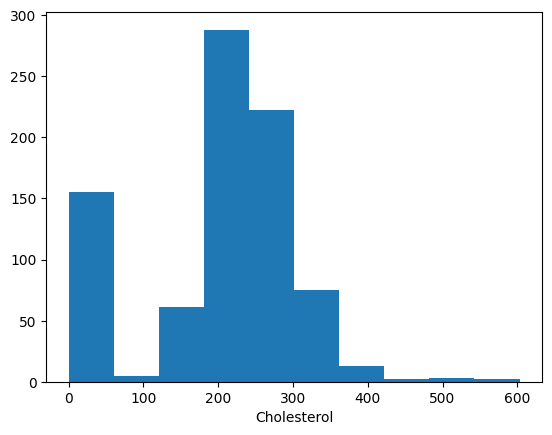

In [9]:
from matplotlib import pyplot as plt 

for f in ['RestingBP','Cholesterol']:
    plt.hist(X_train[f])
    plt.xlabel(f)
    plt.show()

Now we need to impoute those *155* zeros in Cholesterol and *1* zero in RestingBP that remained in train data

In [31]:
from sklearn.impute import SimpleImputer
import numpy as np

imp = SimpleImputer(missing_values=0,strategy='median')

for f in ['RestingBP','Cholesterol']:
    X_train[f] = imp.fit_transform(X_train[f].values.reshape(-1,1))[:,0]

X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,826.0,53.458838,9.392008,28.0,47.0,54.0,60.0,77.0
RestingBP,826.0,132.383777,18.162210,80.0,120.0,130.0,140.0,200.0
Cholesterol,826.0,243.348668,53.563574,85.0,214.0,237.0,266.0,603.0
FastingBS,826.0,0.239709,0.427165,0.0,0.0,0.0,0.0,1.0
MaxHR,826.0,136.796610,25.467551,60.0,120.0,138.0,156.0,202.0
Oldpeak,826.0,0.870339,1.038731,-2.6,0.0,0.5,1.5,5.0


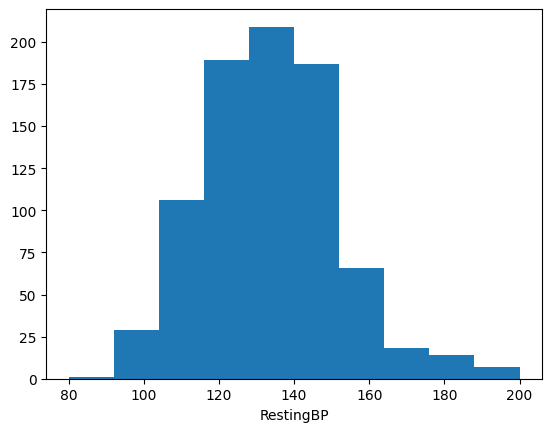

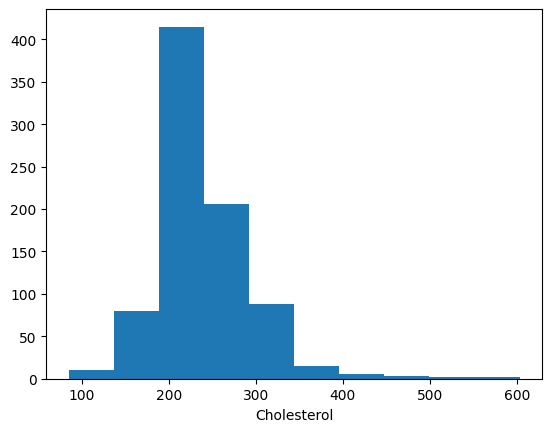

In [33]:
for f in ['RestingBP','Cholesterol']:
    plt.hist(X_train[f])
    plt.xlabel(f)
    plt.show()

In [34]:
# Explore Categorical Data
cat_cols = desc_df['unique'].dropna().index.values
cat_cols

array(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
      dtype=object)

In [13]:
X['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [35]:
#Check target labels are banaced

print("Positive values",y_train[y_train == 1].count(),y_train[y_train == 1].count()/y_train.count())
print("Negative values",y_train[y_train == 0].count(),y_train[y_train == 0].count()/y_train.count())


Positive values 463 0.5605326876513317
Negative values 363 0.43946731234866826


Almost Balanced, So we can safely use Accurecy metric to evaluate Model

Now we can implement the folowing tree-based Algorithms with label encoding:
 1. Decision Tree
 2. Random Forest
 3. AdaBoost

In [15]:
from sklearn.preprocessing  import LabelEncoder

X_train_labeled = X_train.copy()
X_test_labeled = X_test.copy()
for f in cat_cols:
    le = LabelEncoder()
    X_train_labeled[f] = le.fit_transform(X_train_labeled[f])
    X_test_labeled[f] = le.transform(X_test_labeled[f])
    
X_train_labeled.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Age,826.0,53.458838,9.392008,28.0,47.0,54.0,60.0,77.0
Sex,826.0,0.786925,0.409728,0.0,1.0,1.0,1.0,1.0
ChestPainType,826.0,0.777240,0.950287,0.0,0.0,0.0,2.0,3.0
RestingBP,826.0,132.383777,18.162210,80.0,120.0,130.0,140.0,200.0
Cholesterol,826.0,243.348668,53.563574,85.0,214.0,237.0,266.0,603.0
FastingBS,826.0,0.239709,0.427165,0.0,0.0,0.0,0.0,1.0
RestingECG,826.0,0.991525,0.629517,0.0,1.0,1.0,1.0,2.0
MaxHR,826.0,136.796610,25.467551,60.0,120.0,138.0,156.0,202.0
ExerciseAngina,826.0,0.404358,0.491065,0.0,0.0,0.0,1.0,1.0
Oldpeak,826.0,0.870339,1.038731,-2.6,0.0,0.5,1.5,5.0


In [16]:
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import  GridSearchCV
import warnings

def evaluate_classifier(X,y,clf,params):

    grid0 = GridSearchCV(estimator=type(clf)(),param_grid={},cv=3)
                        
    gridp = GridSearchCV(estimator=type(clf)(),
                        param_grid=params,
                        cv=3,
                        verbose=1)
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        grid0.fit(X, y)
        gridp.fit(X, y)

    if gridp.best_score_ > grid0.best_score_:
        grid = gridp
    else:
         grid = grid0

    print('Calssifier',grid.best_estimator_)
    print('Best CV Score', grid.best_score_)
    print('Best Params',grid.best_params_)


    return grid


Hereunder are the models results

In [17]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier 

tree = evaluate_classifier(X_train_labeled,y_train,
                           DecisionTreeClassifier(),
                           {'criterion' : ['gini', 'entropy'],
                            'splitter': ['best','random'],
                            'max_depth': range(1,10),
                            'min_samples_split': range(30,101),
                            'max_features' : [*range(1,10),'sqrt','log2']
                           })

Fitting 3 folds for each of 28116 candidates, totalling 84348 fits
Calssifier DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features=5,
                       min_samples_split=35)
Best CV Score 0.8620026350461133
Best Params {'criterion': 'entropy', 'max_depth': 9, 'max_features': 5, 'min_samples_split': 35, 'splitter': 'best'}


In [18]:
# Random Forest
from  sklearn.ensemble import RandomForestClassifier
forest = evaluate_classifier(X_train_labeled,y_train,
                             RandomForestClassifier(),
                             {
                            'n_estimators': range(7,21),
                            'criterion' : ['gini', 'entropy'],
                            'ccp_alpha': [0.,0.2,0.5,0.7,1],
                            'max_depth': range(5,11),
                            'min_samples_split': range(25,35),
                            'max_features' : [*range(6,11),'sqrt','log2']  
                             })

Fitting 3 folds for each of 58800 candidates, totalling 176400 fits
Calssifier RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_split=28,
                       n_estimators=16)
Best CV Score 0.8789108476064996
Best Params {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_split': 28, 'n_estimators': 16}


In [19]:
# Adaboost
from  sklearn.ensemble import AdaBoostClassifier

ada = evaluate_classifier(X_train_labeled,y_train,
                          AdaBoostClassifier(),
                          {
                            'n_estimators': range(1,51),
                            'learning_rate': [0.,0.1,0.3,0.4,0.5,0.6,0.7,1,3,10],
                            'algorithm': ['SAMME','SAMME.R']
                          })

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
Calssifier AdaBoostClassifier(learning_rate=0.4, n_estimators=9)
Best CV Score 0.8740711462450593
Best Params {'algorithm': 'SAMME.R', 'learning_rate': 0.4, 'n_estimators': 9}


Next Step, is to implement the folowing Algorithms and evaluate each with / without using PCA:
 1. Logistic Regression
 2. Support Vector Machine
 2. K-Nearest Neighbors (KNN) Algorithm

But this time, we need to prepare date by:
1.  Use one hot encoder for nominal categorical data.
2.  Scale numerical data using StandardScaler.

In [55]:
from sklearn.preprocessing import OneHotEncoder


enc = OneHotEncoder(drop='first', sparse_output=False)
encoded = enc.fit_transform(X_train[cat_cols])
encoded_df = pd.DataFrame(encoded,columns=enc.get_feature_names_out(cat_cols),index=X_train.index)
X_train_hot = pd.concat([X_train.drop(cat_cols,axis=1),encoded_df],axis=1)

encoded = enc.transform(X_test[cat_cols])
encoded_df = pd.DataFrame(encoded,columns=enc.get_feature_names_out(cat_cols),index=X_test.index)
X_test_hot = pd.concat([X_test.drop(cat_cols,axis=1),encoded_df],axis=1)

print(X_train.shape,X_train_hot.shape)
X_train_hot.head()

(826, 11) (826, 15)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
10,37,130.0,211.0,0,142,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
563,55,135.0,204.0,1,126,1.1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
448,63,160.0,230.0,1,105,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
579,69,145.0,289.0,1,110,1.8,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
449,55,130.0,237.0,0,155,1.5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [56]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_hot)
X_test_scaled = sc.transform(X_test_hot)

X_train_scaled

array([[-1.75349184, -0.13132882, -0.60429626, ..., -0.82393069,
        -1.01956176,  1.16042704],
       [ 0.16419236,  0.14413488, -0.73506127, ...,  1.21369432,
         0.98081357, -0.86175172],
       [ 1.01649645,  1.52145333, -0.24936267, ...,  1.21369432,
         0.98081357, -0.86175172],
       ...,
       [ 1.65572451,  0.41959857, -0.08123623, ..., -0.82393069,
        -1.01956176,  1.16042704],
       [ 1.33611048, -0.6822562 , -0.11859766, ..., -0.82393069,
        -1.01956176,  1.16042704],
       [ 0.05765435,  0.41959857, -0.08123623, ..., -0.82393069,
        -1.01956176,  1.16042704]])

In [58]:
#Logestic Regression
lr = evaluate_classifier(X_train_scaled,y_train,
                         LogisticRegression(),
                         {'penalty':['l1','l2','elasticnet'],
                            'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                            'C':[0.,0.3,0.5, 1., 2.]
                         }
                        )

Fitting 3 folds for each of 90 candidates, totalling 270 fits
Calssifier LogisticRegression(C=0.3)
Best CV Score 0.8704216073781291
Best Params {'C': 0.3, 'penalty': 'l2', 'solver': 'lbfgs'}


In [59]:
# SVC
from sklearn.svm import SVC

svc = evaluate_classifier(X_train_scaled,y_train,
                          SVC(),
                          {"kernel":["linear", "poly", "rbf", "sigmoid"], 
                            "C":[0.1,0.3,0.7,1],
                            "degree": range(1,21),
                            'gamma' : ['scale', 'auto'],
                            'coef0' : [0,0.1,0.5,1]})

Fitting 3 folds for each of 2560 candidates, totalling 7680 fits
Calssifier SVC(C=0.7, coef0=0, degree=1, kernel='sigmoid')
Best CV Score 0.8656126482213438
Best Params {'C': 0.7, 'coef0': 0, 'degree': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [60]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = evaluate_classifier(X_train_scaled,y_train,
                          KNeighborsClassifier(),
                          {'n_neighbors': [3, 5, 7, 9, 11, 13 , 15],
                            'weights' : ['uniform', 'distance'],
                            'algorithm': ['auto','ball_tree','kd_tree','brute']
                          })

Fitting 3 folds for each of 56 candidates, totalling 168 fits
Calssifier KNeighborsClassifier(n_neighbors=15, weights='distance')
Best CV Score 0.8667896354852876
Best Params {'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'distance'}


In [61]:
# Try to use Prencipal Component Analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [62]:
pca.explained_variance_

array([3.36852811, 1.66422058, 1.2493852 , 1.19885389, 1.12086347])

In [63]:
#Logestic Regression with PCA
lr_pca = evaluate_classifier(X_train_pca,y_train,
                             LogisticRegression(),
                             {'penalty':['l1','l2','elasticnet'],
                            'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                            'C':[0.5, 1., 2.]
                            })

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Calssifier LogisticRegression()
Best CV Score 0.8559025032938076
Best Params {}


In [64]:
# SVC with PCA
from sklearn.svm import SVC

svc_pca = evaluate_classifier(X_train_pca,y_train,
                              SVC(),
                              {"kernel":["linear", "poly", "rbf", "sigmoid"], 
                              "C":[0.1,0.3,0.7,1],
                              "degree": range(1,21),
                              'gamma' : ['scale', 'auto'],
                              'coef0' : [0,0.1,0.5,1]
                              })

Fitting 3 folds for each of 2560 candidates, totalling 7680 fits
Calssifier SVC(C=0.3, coef0=1, degree=2, kernel='poly')
Best CV Score 0.8619587176108915
Best Params {'C': 0.3, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


In [65]:
# KNN with PCA
from sklearn.neighbors import KNeighborsClassifier

knn_pca = evaluate_classifier(X_train_pca,y_train,
                              KNeighborsClassifier(),
                              {'n_neighbors': [3, 5, 7, 9, 11],
                              'weights' : ['uniform', 'distance'],
                              'algorithm': ['auto','ball_tree','kd_tree','brute']
                              })

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Calssifier KNeighborsClassifier(n_neighbors=11)
Best CV Score 0.8522705314009662
Best Params {'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'uniform'}


In [99]:
res = []


for g in [lr,svc,knn,tree,forest,ada]:
    res.append([g.best_estimator_.__class__.__name__,g.best_score_,g.best_params_])

for g in [lr_pca,svc_pca,knn_pca]:
    res.append([g.best_estimator_.__class__.__name__+' With PCA[5]',g.best_score_,g.best_params_])

result_df = pd.DataFrame(res,columns=['model','score','best_params'])
result_df.sort_values(by='score',ascending=False)

,model,score,best_params
4,RandomForestClassifier,0.878911,"{'ccp_alpha': 0.0, 'criterion': 'entropy', 'ma..."
5,AdaBoostClassifier,0.874071,"{'algorithm': 'SAMME.R', 'learning_rate': 0.4,..."
0,LogisticRegression,0.870422,"{'C': 0.3, 'penalty': 'l2', 'solver': 'lbfgs'}"
2,KNeighborsClassifier,0.866790,"{'algorithm': 'auto', 'n_neighbors': 15, 'weig..."
1,SVC,0.865613,"{'C': 0.7, 'coef0': 0, 'degree': 1, 'gamma': '..."
3,DecisionTreeClassifier,0.862003,"{'criterion': 'entropy', 'max_depth': 9, 'max_..."
7,SVC With PCA[5],0.861959,"{'C': 0.3, 'coef0': 1, 'degree': 2, 'gamma': '..."
6,LogisticRegression With PCA[5],0.855903,{}
8,KNeighborsClassifier With PCA[5],0.852271,"{'algorithm': 'auto', 'n_neighbors': 11, 'weig..."


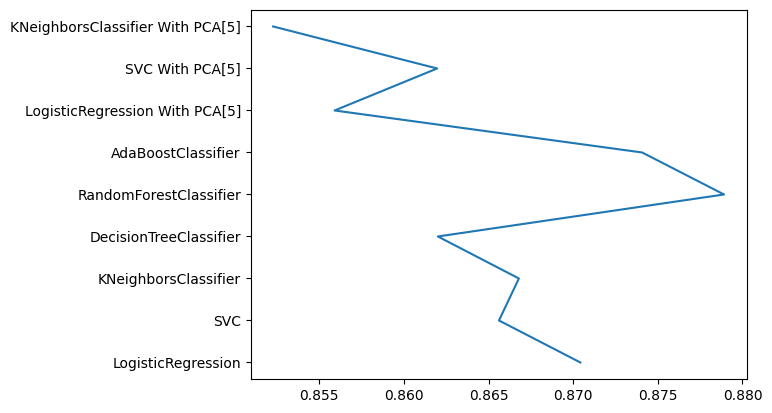

In [136]:
plt.plot(result_df['score'],result_df['model'])
plt.show()


In [139]:
from  sklearn import metrics 
best = forest.best_estimator_
y_pred = best.predict(X_test_labeled)

print('Test Accurecy:',metrics.accuracy_score(y_test,y_pred))


Test Accurecy: 0.8260869565217391
